In [2]:
import gradio as gr
import tensorflow as tf
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()


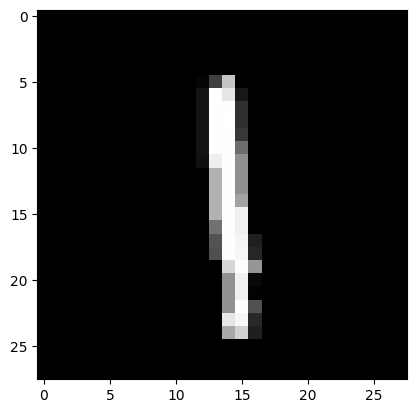

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8],cmap='gray')
plt.show()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train=x_train/255.0

In [7]:
x_test=x_test/255.0

In [8]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [9]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)



In [10]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])



In [12]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 12s 30ms/step - loss: 0.2501 - accuracy: 0.9284 - val_loss: 0.0965 - val_accuracy: 0.9743
Epoch 2/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0737 - accuracy: 0.9774 - val_loss: 0.0753 - val_accuracy: 0.9771
Epoch 3/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.0576 - val_accuracy: 0.9827
Epoch 4/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0585 - val_accuracy: 0.9837
Epoch 5/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0267 - accuracy: 0.9921 - val_loss: 0.0590 - val_accuracy: 0.9825
Epoch 6/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0575 - val_accuracy: 0.9826
Epoch 7/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.0587 - val_accuracy:

In [13]:
def sketch_recognization(img):
    x=model.predict(img.reshape(1,28,28)).argmax(axis=1)
    return x

In [14]:
interface=gr.Interface(fn=sketch_recognization,inputs="sketchpad",
                       outputs="text")
interface.launch(debug=True)



Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\SACHIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\queueing.py", line 527, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SACHIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\route_utils.py", line 261, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SACHIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1786, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SACHIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1338, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SACHIN\AppData\Local\Programs\Python\Python311\Li

Keyboard interruption in main thread... closing server.
